In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install tensorflow Pillow Mat4py matplotlib scikit-learn Numpy PyWavelets torch --quiet

In [ ]:
import os
import PIL.Image
from mat4py import loadmat
import PIL
import matplotlib.pyplot as plt
from sklearn import covariance
import sklearn
import numpy as np
import pywt
import statistics
import torch
import tensorflow as tf

In [ ]:
from mswavelet import MSWavelet
from main import Main

In [ ]:
#print("Torch GPU: ", torch.cuda.get_device_name(0))
#print("Tensorflow GPU: ", tf.config.list_physical_devices('GPU'))

rootdir = "/content/gdrive/My Drive/Preprocessed"
print("Rootdir", "exists: \""+rootdir+"\"" if os.path.exists(path=rootdir) else "does not exist.")

Rootdir exists: "/content/gdrive/My Drive/Preprocessed"


In [ ]:
main = Main(rootdir=rootdir)
main.pop_arrays_simple()

MSWavelet arrays: 
Number of MRI scans:  1849
Number of unhealthy MRI scans:  677
Number of healthy MRI scans:  1172

CNNModel hyperparameters: 
Learning rate:  0.001
Minibatch size:  1
Epochs:  30
Train/Test split:  0.8

CNNModel arrays: 
self.filenames length:  1849
self.unhealthyfilenames length:  677
self.healthyfilenames length:  1172



In [ ]:
main.build_model_CNNNet()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 501, 501, 4)       1732      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 250, 250, 4)      0         
 )                                                               
                                                                 
 spatial_dropout2d (SpatialD  (None, 250, 250, 4)      0         
 ropout2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 4)      16        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 8)       520       
                                                        

Found 1479 non-validated image filenames belonging to 2 classes.
Found 370 non-validated image filenames belonging to 2 classes.
Epoch 1/30
1479/1479 [==============================] - 119s 78ms/step - loss: 0.6227 - accuracy: 0.6437 - mse: 0.2169 - mae: 0.4329 - val_loss: 0.5159 - val_accuracy: 0.7568 - val_mse: 0.1727 - val_mae: 0.3720
Epoch 2/30
1479/1479 [==============================] - 115s 78ms/step - loss: 0.5492 - accuracy: 0.7018 - mse: 0.1866 - mae: 0.3728 - val_loss: 0.4958 - val_accuracy: 0.7730 - val_mse: 0.1633 - val_mae: 0.3182
Epoch 3/30
1479/1479 [==============================] - 116s 79ms/step - loss: 0.5184 - accuracy: 0.7471 - mse: 0.1722 - mae: 0.3441 - val_loss: 0.4761 - val_accuracy: 0.7811 - val_mse: 0.1560 - val_mae: 0.3278
Epoch 4/30
1479/1479 [==============================] - 115s 77ms/step - loss: 0.5109 - accuracy: 0.7525 - mse: 0.1691 - mae: 0.3343 - val_loss: 0.4817 - val_accuracy: 0.7838 - val_mse: 0.1570 - val_mae: 0.3520
Epoch 5/30
1479/1479 [=====

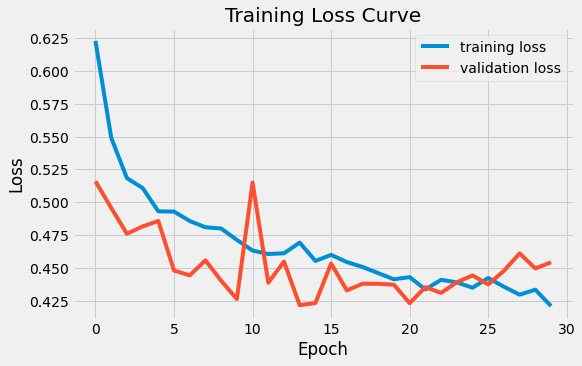

<Figure size 432x288 with 0 Axes>

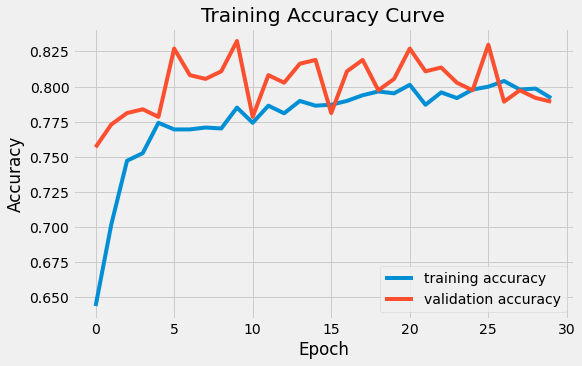

In [ ]:
main.train_model(augment=True)

Found 370 non-validated image filenames belonging to 2 classes.
370/370 [==============================] - 4s 11ms/step



              precision    recall  f1-score   support

           0       0.83      0.92      0.87       235
           1       0.83      0.68      0.75       135

    accuracy                           0.83       370
   macro avg       0.83      0.80      0.81       370
weighted avg       0.83      0.83      0.83       370
 



<Figure size 432x432 with 0 Axes>

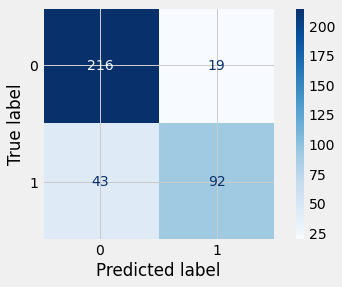

In [ ]:
main.test_model()